# Bank Customer Churn Model



## Objective:-


1.   Data Encoding
2.   Feature Handling

1.   Handling Imbalance Data

    *   Random under Sampling
    *   Random over Sampling

1.  Support Vector Machine Classifier
2.   Grid Search For Hyperparameter Tunning









## Import Data

In [72]:
import pandas as pd

df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')


## Analyse Data

In [73]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [75]:
df.duplicated('CustomerId').sum()

0

In [76]:
df.set_index('CustomerId')

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


## Encoding

In [78]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [79]:
df.replace({'Geography': {'France':2,'Germany':1,'Spain':0}},inplace=True)

In [80]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [81]:
df.replace({'Gender': {'Male':0,'Female':1}},inplace=True)

In [82]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [83]:
df.replace({"Num Of Products": {1:0,2:1,3:1,4:1}},inplace=True)

In [84]:
df["Has Credit Card"].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [85]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [86]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [87]:
import numpy as np
df['Zero Balance']=np.where(df['Balance']>0,1,0)


<Axes: >

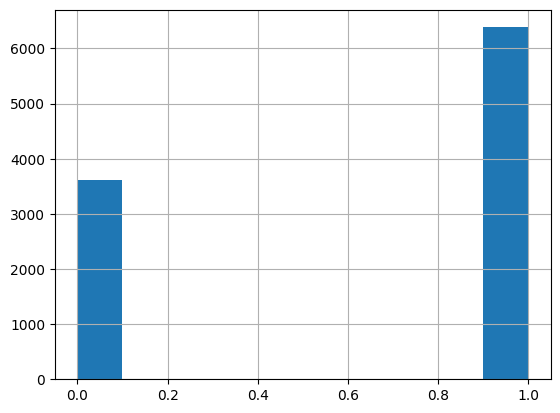

In [88]:
df['Zero Balance'].hist()

In [89]:
df.groupby(['Churn','Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064   
      1                1695     1695         1695    1695  1695    1695   
      2                4204     4204         4204    4204  4204    4204   
1     0                 413      413          413     413   413     413   
      1                 814      814          814     814   814     814   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             2064             2064             2064              2064   
      1             1695             1695             1695              1695   
      2             4204             4204             4204              4204   
1     0              413              413              413               413   
      1              814              814              814               814   
      2              810              810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

## Define Label and Features

In [90]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [91]:
X=df.drop(['Surname','Churn'],axis=1)

In [92]:
y=df['Churn']

In [93]:
X.shape,y.shape

((10000, 12), (10000,))

## Handling Imbalance Data

Class Imbalance is common problem in machine learning, especially in classification problems as machine learning algorithma are designed to maximize accuracy and reduce errors. If data set is imbalance then in such cases, just by predicting majority we get pretty high accuracy, but fails to capture minority cases which is most often the point of creating a model in the first place like in


*   Fraud Detection
*   Spam filtering
*   Disease screening
*   Online Sales churn
*   Advertising click-throughs







**Undersampling** can be defined  as removing obsevations of majority class.This is done until majority and minority class isbalanced out;

Undersampling can be good chhoice when you have a ton od data to think millions of rows. But drawback is that we are removing information that may be valueable.

In under-sampling the simplest technique involves around removing random records from majority class,which can cause loss of info.

drawback to consider when undersampling is that  it can cause overfitting and poor generalization to your test set.

**Oversampling** can  be defined as adding more copies to minority class.Overfitting can be good choice when you don't have ton of data to work with.

The simplest implementation of over-sampling isto duplicate random records from minority class, which can cause overfiting.

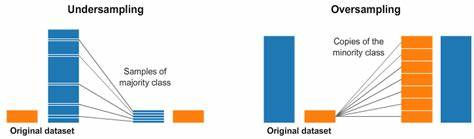



In [94]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

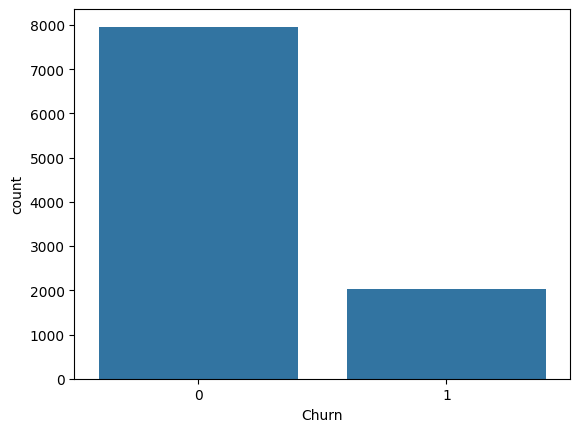

In [95]:
import seaborn as sns
sns.countplot(x='Churn',data=df);


In [96]:
X.shape ,y.shape

((10000, 12), (10000,))

## Random Under Sampling

In [143]:
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler()
X_rus,y_rus=rus.fit_resample(X,y)


In [98]:
X_rus.shape,y_rus.shape, X.shape, y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [99]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [100]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

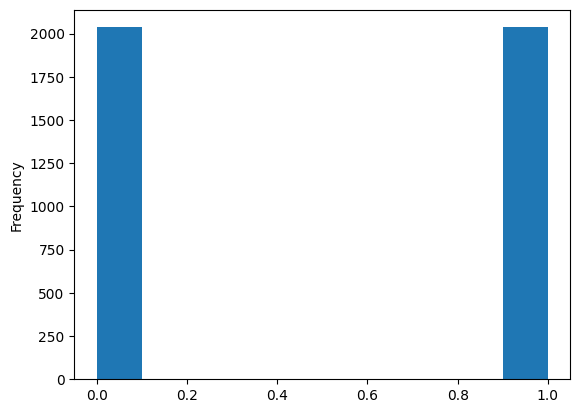

In [101]:
y_rus.plot(kind='hist')

## Random Oversampling

In [102]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X,y)

In [103]:
X_ros.shape,y_ros.shape, X.shape, y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [104]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [105]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

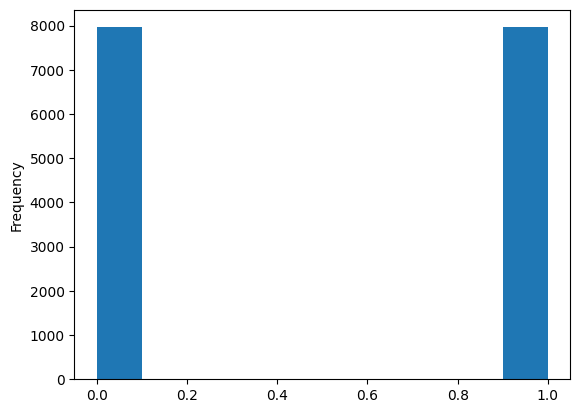

In [106]:
y_ros.plot(kind='hist')

## Train Test Split

In [107]:
from sklearn.model_selection import train_test_split


### Split Original Data

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

### Split Random Under Sample Data

In [109]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.3,random_state=25)

### Split Random Over Sample Data

In [110]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.3,random_state=25)

## Standardize Features

In [111]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

### Standardize Original data

In [112]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [113]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### Standardize Random Under Sample Data

In [114]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [115]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Standardize Random Over Sample Data

In [116]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [117]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Support Vector Machine Classifier


In [118]:
from sklearn.svm import SVC
svc=SVC()

In [119]:
svc.fit(X_train,y_train)

SVC()

In [120]:
y_pred=svc.predict(X_test)

## Model Accuracy

In [121]:
from sklearn.metrics import confusion_matrix,classification_report

In [122]:
confusion_matrix(y_test,y_pred)

array([[2419,    0],
       [ 581,    0]])

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tunning



In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
param_grid={'C':[0.1,1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [126]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [127]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [128]:
grid_predictions=grid.predict(X_test)

In [129]:
confusion_matrix(y_test,grid_predictions)

array([[2419,    0],
       [ 581,    0]])

In [130]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model with Random Under sampling

In [132]:
svc_rus=SVC()

In [133]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [134]:
y_pred_rus=svc_rus.predict(X_test_rus)

### Model Accuracy

In [135]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[603,   0],
       [620,   0]])

In [136]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hyperparameter Tunning

In [137]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [138]:
grid_rus= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [139]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [140]:
grid_predictions_rus=grid_rus.predict(X_test_rus)

In [141]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[602,   1],
       [620,   0]])

In [142]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



## Model with Random Over Sampling

In [144]:
svc_ros=SVC()

In [145]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [147]:
y_pred_ros=svc_ros.predict(X_test_ros)

### Model Accuracy

In [148]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[   0, 2426],
       [   0, 2352]])

In [149]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2426
           1       0.49      1.00      0.66      2352

    accuracy                           0.49      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.24      0.49      0.32      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hyperparameter Tunning

In [150]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [151]:
 grid_ros= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  11.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  10.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  11.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [152]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [153]:
grid_predictions_ros=grid_ros.predict(X_test_ros)

In [154]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2426,    0],
       [ 132, 2220]])

In [156]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2426
           1       1.00      0.94      0.97      2352

    accuracy                           0.97      4778
   macro avg       0.97      0.97      0.97      4778
weighted avg       0.97      0.97      0.97      4778



## Lets compare

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



In [161]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2426
           1       0.49      1.00      0.66      2352

    accuracy                           0.49      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.24      0.49      0.32      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2426
           1       1.00      0.94      0.97      2352

    accuracy                           0.97      4778
   macro avg       0.97      0.97      0.97      4778
weighted avg       0.97      0.97      0.97      4778

